# EXPLORATORY DATA ANALYSIS


## Business Objective

-------------------------------------------------------------------------------------------------------------------------------

 To analyze data sets in order to summarize their main characteristics, often with visual methods.
 Additionally, EDA is used to uncover
 
    -maximize insight into a data set;
    -uncover underlying structure;
    -extract important variables;
    -detect outliers and anomalies;
    -test underlying assumptions;
    -develop parsimonious models; and
    -determine optimal factor settings.
 
-------------------------------------------------------------------------------------------------------------------------------


In [34]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
import time
from scipy.stats import kurtosis
from scipy.stats import skew   
import pylab as p
from IPython.display import Image

## 1.Importing Excel Sheet

In [2]:
#Changing the directory using os package, to the place where the excel sheet exists
os.chdir('C:/Users/Viswa/Desktop/R Project')

#Name of the excel sheet
excel_file='Project.xlsx'

#Reading excel sheet into sales.
sales=pd.read_excel(excel_file)

## 2.Applying Basic Operations on Imported Data

In [3]:
#head(), retreives the information of the first 5 rows.
sales.head()

,po_number,agency,commodity,vendor_name,ordered_date,po_amount,Unnamed: 6,Unnamed: 7,Mode,10000
0,PO491840,OFFICE OF UNIFIED COMMUNICATIONS,9077500:Site Assessment and Site Field Observa...,"ALPHATEC, P.C.",2014-02-14,2500.0,NaN,NaN,Median,2.000000e+04
1,PO491831,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,7853200:Classroom Equipment and Supplies (Not ...,AMERICAN EXPRESS COMPANY,2014-02-14,2500.0,NaN,NaN,Mean,4.092820e+04
2,PO491832,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"4857453:BAGS, ABSORBENT",AMERICAN EXPRESS COMPANY,2014-02-14,2500.0,NaN,NaN,S.D,4.795489e+04
3,PO491832,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"6001942:CALCULATORS, ELECTRONIC, DISPLAY TYPE,...",AMERICAN EXPRESS COMPANY,2014-02-14,2500.0,NaN,NaN,Var,2.299671e+09
4,PO491832,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"7857660:PAPER, WRITING, NEWS PRINT, FOR USE WI...",AMERICAN EXPRESS COMPANY,2014-02-14,2500.0,NaN,NaN,NaN,NaN


In [4]:
#meta-data
sales.info()
sales['po_amount'][1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 10 columns):
po_number       9156 non-null object
agency          9156 non-null object
commodity       9156 non-null object
vendor_name     9156 non-null object
ordered_date    9156 non-null datetime64[ns]
po_amount       9156 non-null float64
Unnamed: 6      0 non-null float64
Unnamed: 7      0 non-null float64
Mode            4 non-null object
10000           4 non-null float64
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 715.4+ KB


2500.0

## 3.Making Changes to Imported Data

In [5]:
#dropping unnecessary columns
sales=sales.drop(['commodity','po_number'],axis=1)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 8 columns):
agency          9156 non-null object
vendor_name     9156 non-null object
ordered_date    9156 non-null datetime64[ns]
po_amount       9156 non-null float64
Unnamed: 6      0 non-null float64
Unnamed: 7      0 non-null float64
Mode            4 non-null object
10000           4 non-null float64
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 572.3+ KB


In [7]:
sales['ordered_date'] = pd.to_datetime(sales['ordered_date'], errors='coerce')

#Adding day_of_the_week column
sales['day_of_the_week'] = sales['ordered_date'].dt.day_name()

#Adding Month column
sales['Month'] = sales['ordered_date'].dt.month_name()
sales

,agency,vendor_name,ordered_date,po_amount,Unnamed: 6,Unnamed: 7,Mode,10000,day_of_the_week,Month
0,OFFICE OF UNIFIED COMMUNICATIONS,"ALPHATEC, P.C.",2014-02-14,2500.00,NaN,NaN,Median,2.000000e+04,Friday,February
1,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,AMERICAN EXPRESS COMPANY,2014-02-14,2500.00,NaN,NaN,Mean,4.092820e+04,Friday,February
2,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,AMERICAN EXPRESS COMPANY,2014-02-14,2500.00,NaN,NaN,S.D,4.795489e+04,Friday,February
3,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,AMERICAN EXPRESS COMPANY,2014-02-14,2500.00,NaN,NaN,Var,2.299671e+09,Friday,February
4,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,AMERICAN EXPRESS COMPANY,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
5,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,AMERICAN EXPRESS COMPANY,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
6,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,COMMUNITY PRODUCTS,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
7,DEPARTMENT OF MENTAL HEALTH,Craig R. Lareau,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
8,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,CULTURAL ALLIANCE OF GREATER,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
9,DEPARTMENT OF PARKS AND RECREATION,DeJuan Davis Jr.,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February


## Meta-Data

In [8]:
#updated meta-data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 10 columns):
agency             9156 non-null object
vendor_name        9156 non-null object
ordered_date       9156 non-null datetime64[ns]
po_amount          9156 non-null float64
Unnamed: 6         0 non-null float64
Unnamed: 7         0 non-null float64
Mode               4 non-null object
10000              4 non-null float64
day_of_the_week    9156 non-null object
Month              9156 non-null object
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 715.4+ KB


In [9]:
#Finding the shape of our data
sales.shape

(9156, 10)

In [10]:
#Describe the data in terms of its many dimensions
sales.describe()

,po_amount,Unnamed: 6,Unnamed: 7,10000
count,9156.000000,0.0,0.0,4.000000e+00
mean,40928.204032,NaN,NaN,5.749450e+08
std,47954.887469,NaN,NaN,1.149817e+09
min,2500.000000,NaN,NaN,2.000000e+04
25%,7680.000000,NaN,NaN,3.569615e+04
50%,20000.000000,NaN,NaN,4.444155e+04
75%,56052.960000,NaN,NaN,5.749538e+08
max,215556.000000,NaN,NaN,2.299671e+09


## Sorting Data

In [11]:
sales_sorted=sales.sort_values(by = 'po_amount',ascending=True)

In [12]:
sales_sorted

,agency,vendor_name,ordered_date,po_amount,Unnamed: 6,Unnamed: 7,Mode,10000,day_of_the_week,Month
0,OFFICE OF UNIFIED COMMUNICATIONS,"ALPHATEC, P.C.",2014-02-14,2500.00,NaN,NaN,Median,20000.000000,Friday,February
29,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"Lexia Learning Systems, Inc",2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
30,DEPARTMENT OF PARKS AND RECREATION,LINCOLN N. NELSON,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
31,DEPARTMENT OF PARKS AND RECREATION,MARCUS SMITH,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
32,DEPUTY MAYOR FOR HEALTH & HUMAN SERVICES,MB STAFFING SERVICES LLC,2013-09-16,2500.00,NaN,NaN,NaN,NaN,Monday,September
33,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,METROPOLITAN OFFICE PRODUCTS,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
35,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,METROPOLITAN OFFICE PRODUCTS,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
36,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,METROPOLITAN OFFICE PRODUCTS,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
37,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,METROPOLITAN OFFICE PRODUCTS,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February
38,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,METROPOLITAN OFFICE PRODUCTS,2014-02-14,2500.00,NaN,NaN,NaN,NaN,Friday,February


## Finding Extremeties (Min - Max)

In [13]:
def min_max_values(col):
    top=sales[col].idxmax()
    top_obs = pd.DataFrame(sales.loc[top])
    
    bottom  = sales[col].idxmin()
    bot_obs = pd.DataFrame(sales.loc[bottom])
    min_max_obs=pd.concat([top_obs, bot_obs],axis=1)
    return min_max_obs

In [14]:
min_max_values('po_amount')

,9155,0
agency,DEPARTMENT OF TRANSPORTATION,OFFICE OF UNIFIED COMMUNICATIONS
vendor_name,"AG Samuel Group, Inc.","ALPHATEC, P.C."
ordered_date,2013-12-04 00:00:00,2014-02-14 00:00:00
po_amount,215556,2500
Unnamed: 6,NaN,NaN
Unnamed: 7,NaN,NaN
Mode,NaN,Median
10000,NaN,20000
day_of_the_week,Wednesday,Friday
Month,December,February


In [15]:
min_max_values('ordered_date')

,760,319
agency,OFFICE OF CHIEF FINANCIAL OFFICER,OFFICE OF CHIEF TECHNOLOGY OFFICER
vendor_name,"Sirius Computer Solutions, Inc","OST, Inc."
ordered_date,2014-02-28 00:00:00,2013-09-03 00:00:00
po_amount,3633,2989
Unnamed: 6,NaN,NaN
Unnamed: 7,NaN,NaN
Mode,NaN,NaN
10000,NaN,NaN
day_of_the_week,Friday,Tuesday
Month,February,September


## Counting and Grouping

### Counting

In [16]:
#Count by category

make_dist=sales.groupby('po_amount').size()
make_dist

po_amount
2500.00      53
2502.45       1
2512.50       1
2515.45       1
2519.40       1
2519.58       1
2520.00       3
2520.60       1
2524.50       1
2525.00       1
2525.21       1
2527.70       3
2529.73       1
2530.00       1
2530.56       1
2533.96       1
2535.64       1
2535.84       1
2538.00       1
2544.00       1
2546.00       1
2548.98       1
2549.91       1
2550.00       2
2557.24       1
2561.00       1
2562.67       1
2562.70       1
2564.21       1
2565.00       1
             ..
207171.00     1
207361.40     1
207412.53     1
207522.68     1
207833.00     1
208333.35     1
208457.58     1
208682.89     1
208725.25     1
209123.77     1
210000.00     8
210240.00     1
210320.43     1
210345.66     1
210366.00     1
210498.00     1
210556.60     1
210615.00     1
210875.00     1
211090.84     1
211825.00     1
212000.00     2
212063.84     1
212500.00     1
212768.61     1
214000.00     1
214017.00     1
214143.00     1
214492.35     1
215556.00     1
Length: 5498, 

In [17]:
#Count by category

make_dist=sales.groupby('ordered_date').size()
make_dist

ordered_date
2013-09-03     93
2013-09-04     45
2013-09-05     91
2013-09-06    155
2013-09-07      2
2013-09-09    117
2013-09-10    101
2013-09-11    203
2013-09-12     99
2013-09-13    133
2013-09-14      2
2013-09-16    115
2013-09-17    131
2013-09-18    133
2013-09-19    152
2013-09-20    112
2013-09-23    119
2013-09-24    108
2013-09-25    143
2013-09-26    263
2013-09-27    338
2013-10-01    340
2013-10-02     22
2013-10-03     12
2013-10-04     28
2013-10-05      2
2013-10-07     24
2013-10-08     23
2013-10-09     15
2013-10-10     40
             ... 
2014-01-17     53
2014-01-18      1
2014-01-21      1
2014-01-22     18
2014-01-23     12
2014-01-24     11
2014-01-27     14
2014-01-28     13
2014-01-29     18
2014-01-30     12
2014-01-31      7
2014-02-03     14
2014-02-04     13
2014-02-05      7
2014-02-06     29
2014-02-07     17
2014-02-10     15
2014-02-11      8
2014-02-12     14
2014-02-14    123
2014-02-17      8
2014-02-18     64
2014-02-19     94
2014-02-20    1

### Grouping

In [18]:
make_dist=sales.groupby('Month').size()
make_dist

Month
December      471
February     1175
January       315
November     2630
October      1910
September    2655
dtype: int64

In [19]:
make_dist=sales.groupby('day_of_the_week').size()
make_dist

day_of_the_week
Friday       1983
Monday       1385
Saturday        7
Thursday     2117
Tuesday      1926
Wednesday    1738
dtype: int64

## Dimensions Of Data

### Completeness
    -Completeness is defined as expected comprehensiveness. Data can be complete even if optional data is missing. 

Data has no missing values or NA or NAN values.

Thus, all requisite information is available.

They are all in an unusable state.

Thus data is complete

### Consistency
    -Consistency means data across all systems reflects the same information and are in synch with each other across the enterprise. 


All data values are of the same data types across the data set.

There are no distinct occurrences of the same data instances that provide conflicting information.

Thus the data is consistent

### Accuracy
    -Accuracy is the degree to which data correctly reflects the real world object OR an event being described. 

All data objects accurately represent “real world” values they are expected to model.

There are no there incorrect spellings of product or person names, addresses, and even untimely or not current data.

### Timeliness
    -Timeliness references whether information is available when it is expected and needed. Timeliness of data is very important.

Online availability of data is present at https://data.world/finance/dc-purchase-orders-2014, thus making the data viewable and quick to access.

### Integrity
    -Integrity means validity of data across the relationships and ensures that all data in a database can be traced and connected to other data

There are no pieces of data missing nor lack of important relationship linkages.

## Correlation

In [20]:
sales_corr=sales.corr()['po_amount'][:-1]

In [21]:
sales_corr

po_amount     1.0
Unnamed: 6    NaN
Unnamed: 7    NaN
Name: po_amount, dtype: float64

In [22]:
#y_vars = sales.strftime('%Y-%m-%d').sort_values().unique()
#ay.set_yticklabels(labels=y_vars, rotation=45, ha='right')


#fig, ax = plt.subplots(figsize = (12,6))    
#fig = sns.pairplot(x = "12monthsEnding", y = "uniqueClientExits", data = emp, 
                  #estimator = sum, ci = None, ax=ax)

#x_dates = emp['12monthsEnding'].dt.strftime('%Y-%m-%d').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

#https://stackoverflow.com/questions/51105648/ordering-and-formatting-dates-on-x-axis-in-seaborn-bar-plot

## Business Plots

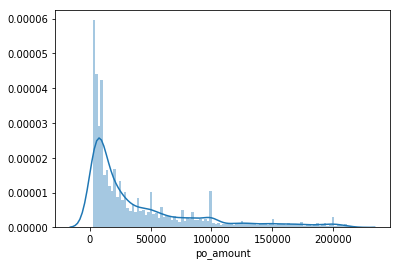

In [23]:
#Probability density function
sns.distplot(sales['po_amount'],bins=100)

(array([1161.,  858.,  566.,  828.,  294.,  319.,  234.,  204.,  330.,
         169.,  262.,  151.,  199.,  106.,   91.,  132.,   89.,  166.,
          91.,   96.,   71.,   87.,  197.,   76.,   82.,   50.,  117.,
          56.,   62.,   63.,   40.,   63.,   43.,   32.,   96.,   38.,
          51.,   48.,   86.,   42.,   40.,   47.,   38.,   45.,   34.,
         203.,   22.,   20.,   22.,   14.,   21.,   18.,   23.,   19.,
          15.,   24.,   26.,   37.,   18.,   23.,   24.,   22.,   24.,
          15.,   17.,   19.,   20.,   16.,   17.,   49.,   11.,   17.,
          18.,   18.,   12.,   25.,   20.,   19.,   17.,   17.,   28.,
          10.,   11.,   13.,    9.,   14.,   23.,    9.,   15.,   25.,
           8.,   11.,   56.,   10.,   12.,   12.,   10.,   17.,    6.,
           5.]),
 array([  2500.  ,   4630.56,   6761.12,   8891.68,  11022.24,  13152.8 ,
         15283.36,  17413.92,  19544.48,  21675.04,  23805.6 ,  25936.16,
         28066.72,  30197.28,  32327.84,  34458.4 ,  3

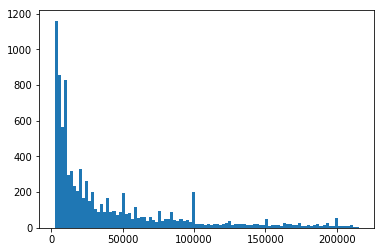

In [24]:
num_bins=100
plt.hist(sales['po_amount'],num_bins)

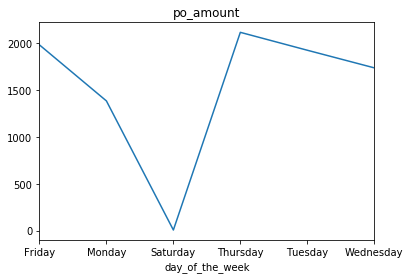

In [25]:
#Distribution of Categorical Variables
make_dist.plot(title='po_amount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C512D5908>,
      dtype=object)

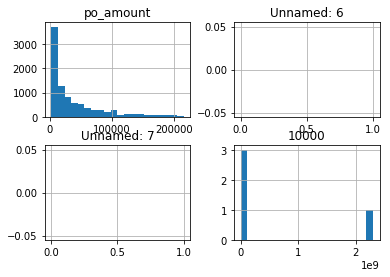

In [26]:
sales.hist(bins=20)

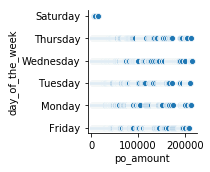

In [27]:
#Pairplot to find the relationship between Purchase Order Amount and the Day of the week for relation]

sns.pairplot(x_vars=['po_amount'],y_vars=['day_of_the_week'],data=sales)

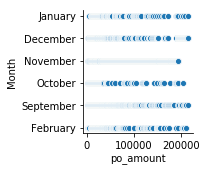

In [28]:
#Pairplot to find the relationship between Purchase Order Amount and the Month for relation]

sns.pairplot(x_vars=['po_amount'],y_vars=['Month'],data=sales)

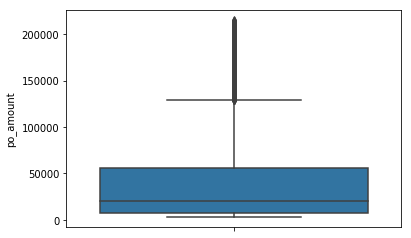

In [29]:
#Box-plot between the Purchase Order amount to find outliers. This is from an overall perspective.

box1=sns.boxplot(y='po_amount',data=sales)

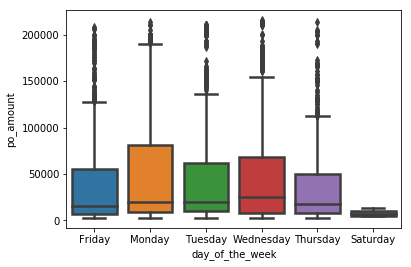

In [30]:
#Box-plot between the Purchase Order amount to find outliers. This is from a daily perspective.

ax = sns.boxplot(x="day_of_the_week", y="po_amount",data=sales, linewidth=2.5)

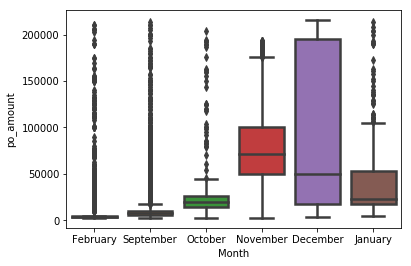

In [31]:
#Box-plot between the Purchase Order amount to find outliers. This is from a monthly perspective.

ax = sns.boxplot(x="Month", y="po_amount",data=sales, linewidth=2.5)

## Kurtosis and Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

Kurtosis describes how sharp the tip of the graph is

In [32]:
# skewness along the index axis 
print("The Skew is ")
sales.skew(axis = 0, skipna = False) 

The Skew is 


po_amount     1.688092
Unnamed: 6         NaN
Unnamed: 7         NaN
10000              NaN
dtype: float64

Since the skewness of the plot w.r.t. po_amount is positive, the mean and the median will be greater than the mode.

This also means that the distribution of po_amount is skewed towards the right.

In [33]:
# Calculating the kurtosis
x1 = sales['po_amount'] 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
print("The Kurtosis is ")
kurtosis(y1)

The Kurtosis is 


-3.0

Since the kurtosis is less than zero,the distribution is light tails and is called a platykurtic distribution. This signifies the presence of extremely sharp areas in the curve.